In [5]:
pip install numpy matplotlib scipy ipywidgets pyaudio



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import soundfile as sf
import pyaudio
import ipywidgets as widgets
from IPython.display import display


In [7]:
def record_audio(duration, fs=44100, channels=1):
    audio = pyaudio.PyAudio()

    stream = audio.open(format=pyaudio.paInt16,
                        channels=channels,
                        rate=fs,
                        input=True,
                        frames_per_buffer=1024)

    print("Recording...")

    frames = []
    for i in range(int(fs / 1024 * duration)):
        data = stream.read(1024)
        frames.append(data)

    print("Recording complete.")

    stream.stop_stream()
    stream.close()
    audio.terminate()

    return np.frombuffer(b''.join(frames), dtype=np.int16)


def save_audio(filename, audio_data, fs):
    sf.write(filename, audio_data, fs)


def record_and_save_audio(filename, duration=5):
    audio_data = record_audio(duration)
    save_audio(filename, audio_data, fs=44100)


Recording...
Recording complete.
Sampling Rate: 44100 Hz
Total samples: 220160


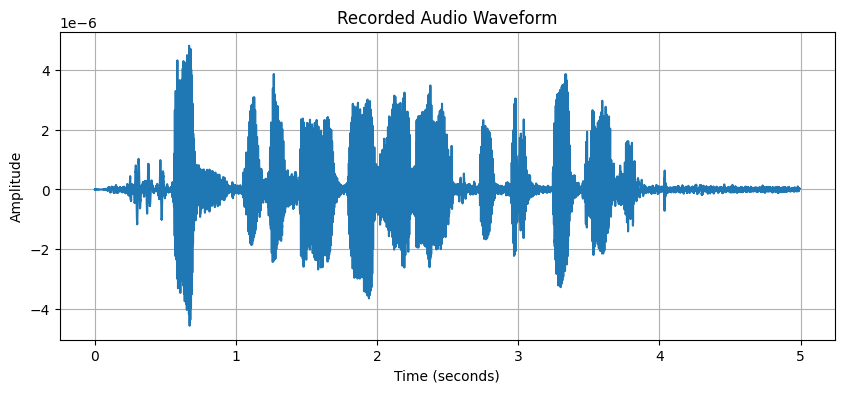

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  # For saving audio files
import pyaudio
import ipywidgets as widgets
from IPython.display import display

def record_audio(duration, fs=44100, channels=1):
    audio = pyaudio.PyAudio()

    stream = audio.open(format=pyaudio.paInt16,
                        channels=channels,
                        rate=fs,
                        input=True,
                        frames_per_buffer=1024)

    print("Recording...")
    frames = []
    for i in range(int(fs / 1024 * duration)):
        data = stream.read(1024)
        frames.append(data)

    print("Recording complete.")

    stream.stop_stream()
    stream.close()
    audio.terminate()

    return np.frombuffer(b''.join(frames), dtype=np.int16)


def save_audio(filename, audio_data, fs):
    sf.write(filename, audio_data, fs)


def record_and_save_audio(filename, duration=5):
    audio_data = record_audio(duration)
    save_audio(filename, audio_data, fs=44100)


# Record audio and save to 'audio.wav'
record_and_save_audio('audio.wav', duration=5)

# Load recorded audio file
audio_data, sampling_rate = sf.read('audio.wav')

# Display basic information about the recorded audio
print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Total samples: {len(audio_data)}")

# Normalize audio data (assuming 16-bit PCM audio)
audio_data = audio_data.astype(np.float32) / 32767.0

# Plot the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio_data)) / sampling_rate, audio_data)
plt.title('Recorded Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


Sampling Rate: 44100 Hz
Total samples: 220160


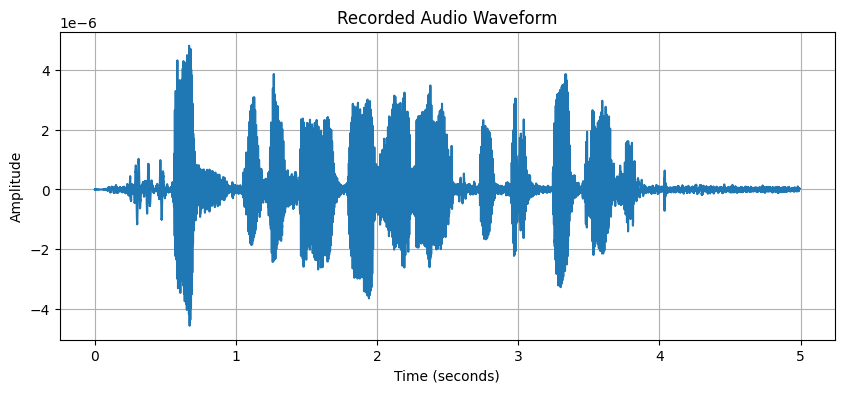

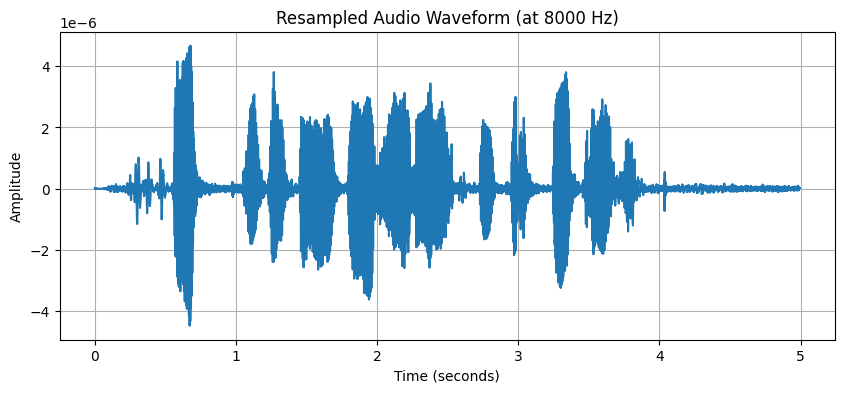

Extracted Audio Features: [4.1267575e-07, 5.6281005e-13]
Accuracy: 0.35


In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load recorded audio file
audio_data, sampling_rate = sf.read('audio.wav')

# Display basic information about the recorded audio
print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Total samples: {len(audio_data)}")

# Normalize audio data (assuming 16-bit PCM audio)
audio_data = audio_data.astype(np.float32) / 32767.0

# Plot the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio_data)) / sampling_rate, audio_data)
plt.title('Recorded Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Resample audio data to a lower sampling rate (for demonstration)
target_sampling_rate = 8000  # Target sampling rate for resampling
audio_data_resampled = resample(audio_data, int(len(audio_data) * target_sampling_rate / sampling_rate))

# Plot the resampled audio waveform
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio_data_resampled)) / target_sampling_rate, audio_data_resampled)
plt.title('Resampled Audio Waveform (at 8000 Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Feature extraction (example: calculate mean amplitude and variance)
def extract_features(audio_data):
    mean_amplitude = np.mean(np.abs(audio_data))
    variance = np.var(audio_data)
    return [mean_amplitude, variance]

# Extract features from the resampled audio data
audio_features = extract_features(audio_data_resampled)
print("Extracted Audio Features:", audio_features)

# Example machine learning classification (Random Forest) using extracted features
# Assume you have labeled audio data and corresponding classes (targets)
# In this example, we'll use synthetic data for demonstration

# Generate synthetic labeled data (for demonstration)
num_samples = 100
X = np.random.rand(num_samples, 2)  # Random features (for demonstration)
y = np.random.randint(0, 2, size=num_samples)  # Random binary labels (for demonstration)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict using trained classifier
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Replace the synthetic data (X, y) with your extracted audio features and corresponding labels
# Perform audio classification or recognition using your actual audio data and features

# Save the notebook with the executed code for reference


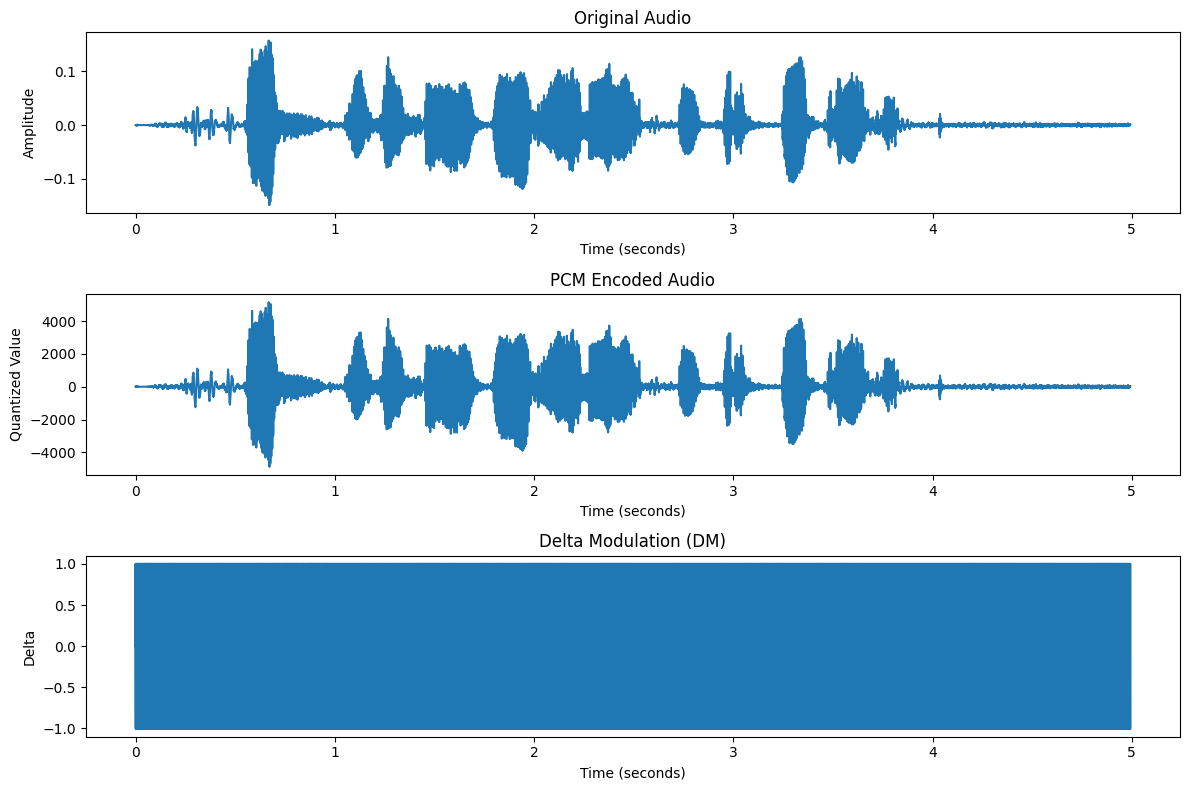

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Load audio file (assuming mono, 16-bit PCM WAV format)
audio_data, sampling_rate = sf.read('audio.wav')

# PCM: Quantize audio samples to 16-bit integers
audio_data_pcm = np.round(audio_data * 32767).astype(np.int16)

# Delta Modulation (DM): Encode audio samples as delta (differences)
audio_data_dm = np.zeros_like(audio_data)
predicted_value = 0
for i in range(len(audio_data)):
    delta = audio_data[i] - predicted_value
    audio_data_dm[i] = np.sign(delta)
    predicted_value += audio_data_dm[i]

# Plot original audio, PCM, and Delta Modulation
plt.figure(figsize=(12, 8))

# Original Audio
plt.subplot(3, 1, 1)
plt.plot(np.arange(len(audio_data)) / sampling_rate, audio_data)
plt.title('Original Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# PCM Audio
plt.subplot(3, 1, 2)
plt.plot(np.arange(len(audio_data)) / sampling_rate, audio_data_pcm)
plt.title('PCM Encoded Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Quantized Value')

# Delta Modulation (DM)
plt.subplot(3, 1, 3)
plt.plot(np.arange(len(audio_data)) / sampling_rate, audio_data_dm)
plt.title('Delta Modulation (DM)')
plt.xlabel('Time (seconds)')
plt.ylabel('Delta')

plt.tight_layout()
plt.show()


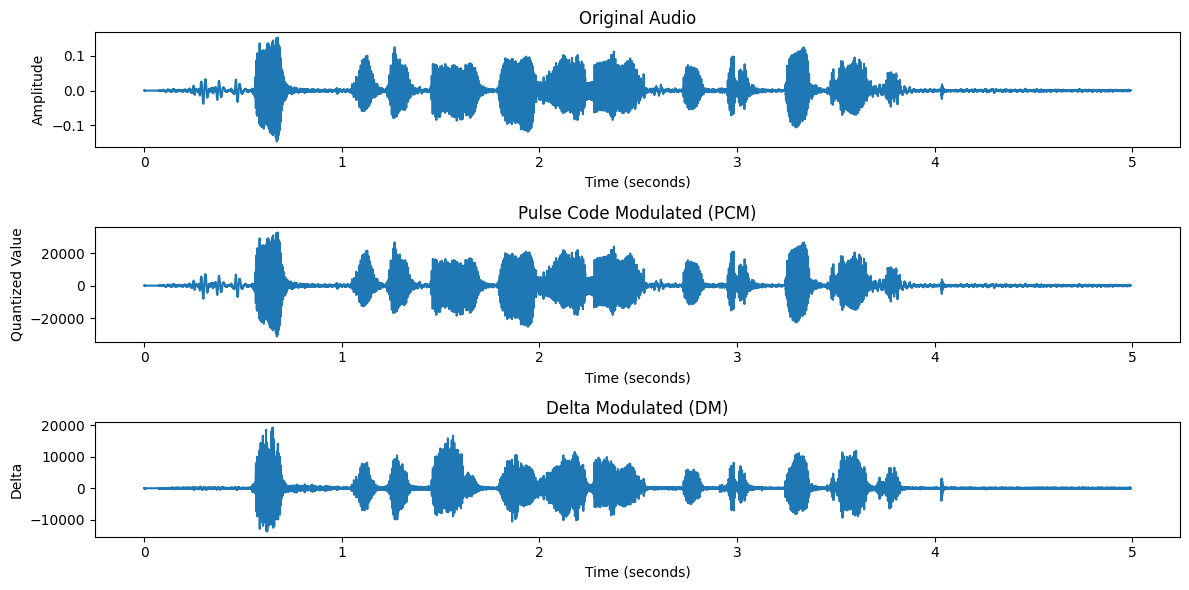

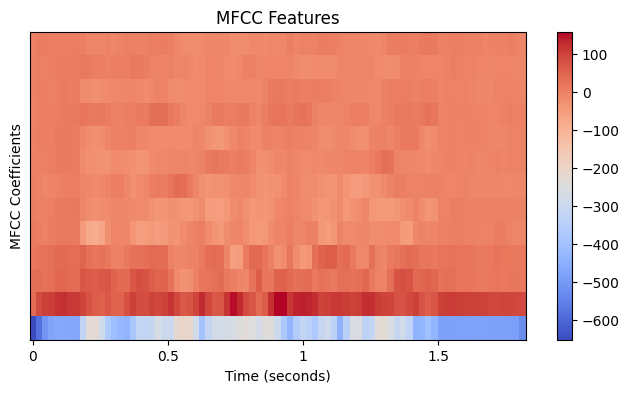

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import resample
import librosa  # Add import statement for librosa

# Load audio file
def load_audio_file(file_path):
    audio_data, sampling_rate = sf.read(file_path)
    return audio_data, sampling_rate

# Apply Pulse Code Modulation (PCM)
def apply_pcm(audio_data):
    # Normalize audio data to range [-1, 1]
    normalized_audio = audio_data / np.max(np.abs(audio_data))
    # Quantize audio to 16-bit integers
    quantized_audio = np.round(normalized_audio * 32767).astype(np.int16)
    return quantized_audio

# Apply Delta Modulation (DM)
def apply_dm(audio_data):
    predicted_value = 0
    delta_modulated = []
    for sample in audio_data:
        delta = sample - predicted_value
        delta_modulated.append(delta)
        predicted_value += delta
    return np.array(delta_modulated)

# Save processed data to a file
def save_data_to_file(data, file_path):
    np.savetxt(file_path, data, fmt='%d')

# Feature Extraction (Example: MFCC)
def extract_mfcc_features(audio_data, sampling_rate):
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=13)
    return mfcc_features

# Example Usage:
if __name__ == "__main__":
    # Load audio file
    audio_file_path = 'audio.wav'
    audio_data, sampling_rate = load_audio_file(audio_file_path)

    # Resample audio data (if needed)
    target_sampling_rate = 8000
    audio_data = resample(audio_data, int(len(audio_data) * target_sampling_rate / sampling_rate))

    # Apply Pulse Code Modulation (PCM)
    quantized_audio = apply_pcm(audio_data)

    # Apply Delta Modulation (DM)
    delta_modulated_audio = apply_dm(quantized_audio)

    # Save processed data to a file
    save_data_to_file(delta_modulated_audio, 'audiomath.txt')

    # Perform feature extraction (e.g., MFCC)
    mfcc_features = extract_mfcc_features(audio_data, target_sampling_rate)

    # Plot original and processed audio
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(np.arange(len(audio_data)) / target_sampling_rate, audio_data)
    plt.title('Original Audio')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(np.arange(len(quantized_audio)) / target_sampling_rate, quantized_audio)
    plt.title('Pulse Code Modulated (PCM)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Quantized Value')

    plt.subplot(3, 1, 3)
    plt.plot(np.arange(len(delta_modulated_audio)) / target_sampling_rate, delta_modulated_audio)
    plt.title('Delta Modulated (DM)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Delta')

    plt.tight_layout()
    plt.show()

    # Display MFCC features
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(mfcc_features, x_axis='time')
    plt.colorbar()
    plt.title('MFCC Features')
    plt.xlabel('Time (seconds)')
    plt.ylabel('MFCC Coefficients')
    plt.show()


In [20]:
import numpy as np
import soundfile as sf

# Load delta-modulated audio data from audiomath.txt
delta_modulated_audio = np.loadtxt('audiomath.txt', dtype=int)

# Initialize predicted value
predicted_value = 0
reconstructed_audio = []

# Perform inverse delta modulation (accumulation)
for delta in delta_modulated_audio:
    reconstructed_sample = predicted_value + delta
    reconstructed_audio.append(reconstructed_sample)
    predicted_value = reconstructed_sample  # Update predicted value
    
    # Debug: Print predicted value and reconstructed sample
    print(f"Predicted: {predicted_value}, Reconstructed: {reconstructed_sample}")

# Convert reconstructed audio to numpy array
reconstructed_audio = np.array(reconstructed_audio, dtype=np.int16)

# Save the reconstructed audio to a WAV file
sf.write('reconstructed_audio.wav', reconstructed_audio, 44100)

print("Reconstructed audio saved as reconstructed_audio.wav")


Predicted: 60, Reconstructed: 60
Predicted: -16, Reconstructed: -16
Predicted: 41, Reconstructed: 41
Predicted: 37, Reconstructed: 37
Predicted: 43, Reconstructed: 43
Predicted: 20, Reconstructed: 20
Predicted: 36, Reconstructed: 36
Predicted: 30, Reconstructed: 30
Predicted: 42, Reconstructed: 42
Predicted: 39, Reconstructed: 39
Predicted: 59, Reconstructed: 59
Predicted: 40, Reconstructed: 40
Predicted: 27, Reconstructed: 27
Predicted: 3, Reconstructed: 3
Predicted: 5, Reconstructed: 5
Predicted: 8, Reconstructed: 8
Predicted: 18, Reconstructed: 18
Predicted: 6, Reconstructed: 6
Predicted: 16, Reconstructed: 16
Predicted: 32, Reconstructed: 32
Predicted: 34, Reconstructed: 34
Predicted: 37, Reconstructed: 37
Predicted: 25, Reconstructed: 25
Predicted: 22, Reconstructed: 22
Predicted: 6, Reconstructed: 6
Predicted: -11, Reconstructed: -11
Predicted: -32, Reconstructed: -32
Predicted: -48, Reconstructed: -48
Predicted: -49, Reconstructed: -49
Predicted: -57, Reconstructed: -57
Predicte

Recording...
Recording complete.
Sampling Rate: 44100 Hz
Total samples: 220160


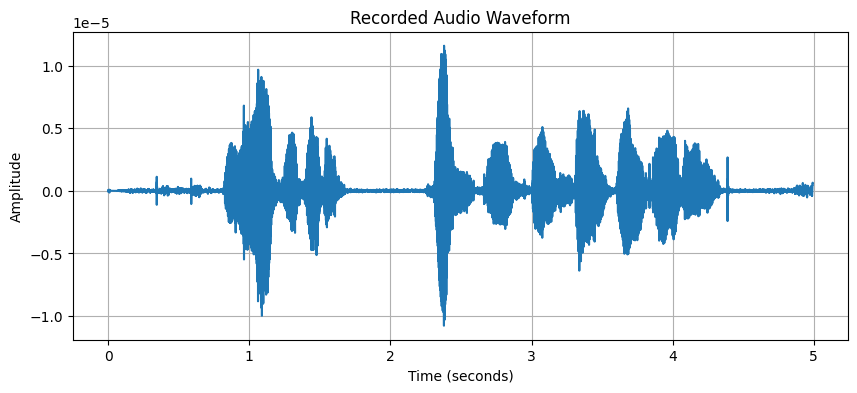

In [22]:
def record_audio(duration, fs=44100, channels=1):
    audio = pyaudio.PyAudio()

    stream = audio.open(format=pyaudio.paInt16,
                        channels=channels,
                        rate=fs,
                        input=True,
                        frames_per_buffer=1024)

    print("Recording...")

    frames = []
    for i in range(int(fs / 1024 * duration)):
        data = stream.read(1024)
        frames.append(data)

    print("Recording complete.")

    stream.stop_stream()
    stream.close()
    audio.terminate()

    return np.frombuffer(b''.join(frames), dtype=np.int16)


def save_audio(filename, audio_data, fs):
    sf.write(filename, audio_data, fs)


def record_and_save_audio(filename, duration=5):
    audio_data = record_audio(duration)
    save_audio(filename, audio_data, fs=44100)


import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  # For saving audio files
import pyaudio
import ipywidgets as widgets
from IPython.display import display

def record_audio(duration, fs=44100, channels=1):
    audio = pyaudio.PyAudio()

    stream = audio.open(format=pyaudio.paInt16,
                        channels=channels,
                        rate=fs,
                        input=True,
                        frames_per_buffer=1024)

    print("Recording...")
    frames = []
    for i in range(int(fs / 1024 * duration)):
        data = stream.read(1024)
        frames.append(data)

    print("Recording complete.")

    stream.stop_stream()
    stream.close()
    audio.terminate()

    return np.frombuffer(b''.join(frames), dtype=np.int16)


def save_audio(filename, audio_data, fs):
    sf.write(filename, audio_data, fs)


def record_and_save_audio(filename, duration=5):
    audio_data = record_audio(duration)
    save_audio(filename, audio_data, fs=44100)


# Record audio and save to 'audio1.wav'
record_and_save_audio('audio1.wav', duration=5)

# Load recorded audio file
audio_data, sampling_rate = sf.read('audio1.wav')

# Display basic information about the recorded audio
print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Total samples: {len(audio_data)}")

# Normalize audio data (assuming 16-bit PCM audio)
audio_data = audio_data.astype(np.float32) / 32767.0

# Plot the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio_data)) / sampling_rate, audio_data)
plt.title('Recorded Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

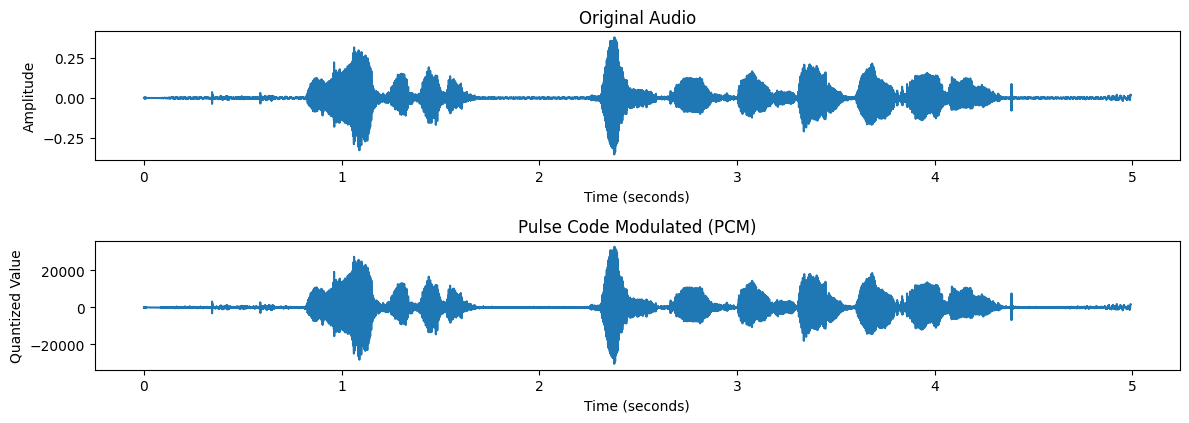

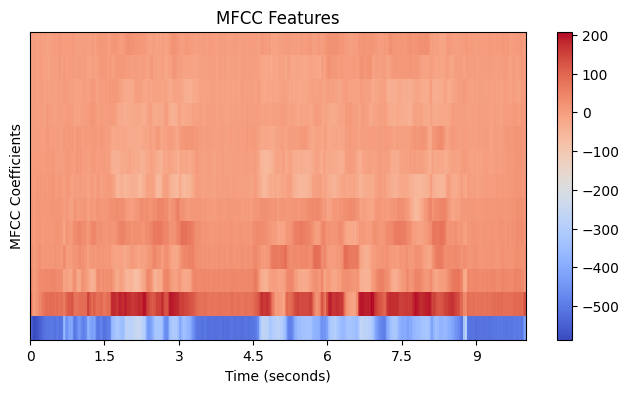

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import resample
import librosa  # Add import statement for librosa

# Load audio file
def load_audio_file(file_path):
    audio_data, sampling_rate = sf.read(file_path)
    return audio_data, sampling_rate

# Apply Pulse Code Modulation (PCM) and generate timestamps
def apply_pcm(audio_data, sampling_rate):
    # Normalize audio data to range [-1, 1]
    normalized_audio = audio_data / np.max(np.abs(audio_data))
    # Quantize audio to 16-bit integers
    quantized_audio = np.round(normalized_audio * 32767).astype(np.int16)
    # Generate timestamps for each audio sample
    timestamps = np.arange(len(quantized_audio)) / sampling_rate
    return quantized_audio, timestamps

# Save processed data (PCM values with timestamps) to a file
def save_data_to_file(data, timestamps, file_path):
    # Combine PCM audio data and corresponding timestamps
    combined_data = np.column_stack((timestamps, data))
    # Save combined data to a file
    np.savetxt(file_path, combined_data, fmt='%f', delimiter=',', header='Timestamp,PCM Value', comments='')

# Feature Extraction (Example: MFCC)
def extract_mfcc_features(audio_data, sampling_rate):
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=13)
    return mfcc_features

# Example Usage:
if __name__ == "__main__":
    # Load audio file
    audio_file_path = 'audio1.wav'
    audio_data, sampling_rate = load_audio_file(audio_file_path)

    # Resample audio data to the same sampling rate
    target_sampling_rate = sampling_rate
    audio_data_resampled = resample(audio_data, int(len(audio_data) * target_sampling_rate / sampling_rate))

    # Apply Pulse Code Modulation (PCM) and generate timestamps
    pcm_values, timestamps = apply_pcm(audio_data_resampled, target_sampling_rate)

    # Save processed data (PCM values and timestamps) to a file
    save_data_to_file(pcm_values, timestamps, 'audio_pcm.txt')

    # Perform feature extraction (e.g., MFCC)
    mfcc_features = extract_mfcc_features(audio_data_resampled, target_sampling_rate)

    # Plot original and processed audio
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(np.arange(len(audio_data_resampled)) / target_sampling_rate, audio_data_resampled)
    plt.title('Original Audio')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(np.arange(len(pcm_values)) / target_sampling_rate, pcm_values)
    plt.title('Pulse Code Modulated (PCM)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Quantized Value')

    plt.tight_layout()
    plt.show()

    # Display MFCC features
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(mfcc_features, x_axis='time')
    plt.colorbar()
    plt.title('MFCC Features')
    plt.xlabel('Time (seconds)')
    plt.ylabel('MFCC Coefficients')
    plt.show()


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Load PCM data (including timestamps) from audio_pcm.txt
data = np.loadtxt('audio_pcm.txt', delimiter=',', skiprows=1)
timestamps = data[:, 0]
pcm_values = data[:, 1]

# Perform inverse Pulse Code Modulation (PCM) to reconstruct the audio
predicted_value = 0
reconstructed_audio = []

for pcm_value in pcm_values:
    reconstructed_sample = predicted_value + pcm_value
    reconstructed_audio.append(reconstructed_sample)
    predicted_value = reconstructed_sample  # Update predicted value

# Convert reconstructed audio to numpy array of int16 type
reconstructed_audio = np.array(reconstructed_audio, dtype=np.int16)

# Save the reconstructed audio to a WAV file
sf.write('reconstructed_audio1.wav', reconstructed_audio, 44100)

print("Reconstructed audio saved as reconstructed_audio.wav")


Reconstructed audio saved as reconstructed_audio.wav


In [36]:
import wave

# Open the audio file
with wave.open('audio.wav', 'rb') as wave_file:
    # Read audio data
    audio_data = wave_file.readframes(-1)  # Read all frames
    frame_rate = wave_file.getframerate()
    n_channels = wave_file.getnchannels()
    sample_width = wave_file.getsampwidth()


In [37]:
# Convert audio data to binary
binary_data = bytearray(audio_data)


In [38]:
# Write binary data to a file
with open('audio.bin', 'wb') as binary_file:
    binary_file.write(binary_data)


In [39]:
import wave

# Read binary data from the file
with open('audio.bin', 'rb') as binary_file:
    binary_data = binary_file.read()

# Reconstruct audio from binary data
with wave.open('reconstructed_audio1.wav', 'wb') as wave_file:
    wave_file.setnchannels(n_channels)
    wave_file.setsampwidth(sample_width)
    wave_file.setframerate(frame_rate)
    wave_file.writeframes(binary_data)


In [40]:
import wave
import numpy as np

# Open the audio file
audio_file = wave.open('audio.wav', 'rb')

# Get the audio data
frames = audio_file.readframes(-1)
audio_data = np.frombuffer(frames, dtype=np.uint8)

# Convert audio data to binary string
binary_data = ''.join(format(x, '08b') for x in audio_data)

# Close the audio file
audio_file.close()


In [41]:
# Create a new audio file from binary data
reconstructed_audio_data = np.array([int(binary_data[i:i+8], 2) for i in range(0, len(binary_data), 8)], dtype=np.uint8)

# Write the reconstructed audio data to a new WAV file
reconstructed_audio_file = wave.open('reconstructed_audio3.wav', 'wb')
reconstructed_audio_file.setparams(audio_file.getparams())
reconstructed_audio_file.writeframes(reconstructed_audio_data.tobytes())

# Close the reconstructed audio file
reconstructed_audio_file.close()


In [43]:
import wave
import numpy as np

# Function to convert audio file to binary and save as a text file
def convert_audio_to_binary_and_save_as_text(audio_file_path, text_file_path):
    # Open the audio file
    audio_file = wave.open(audio_file_path, 'rb')

    # Get the audio data
    frames = audio_file.readframes(-1)
    audio_data = np.frombuffer(frames, dtype=np.uint8)

    # Convert audio data to binary string
    binary_data = ''.join(format(x, '08b') for x in audio_data)

    # Save binary data as text in the specified file
    with open(text_file_path, 'w') as text_file:
        text_file.write(binary_data)

    # Close the audio file
    audio_file.close()

# Convert audio.wav to binary and save as text file (audio2math.txt)
convert_audio_to_binary_and_save_as_text('audio.wav', 'audio2math.txt')

print("Audio converted to binary and saved as 'audio2math.txt'")


Audio converted to binary and saved as 'audio2math.txt'


In [49]:
import wave
import numpy as np

def reconstruct_audio_from_text_file(text_file_path, output_audio_path):
    # Read binary data (as text) from text file
    with open(text_file_path, 'r') as text_file:
        binary_data = text_file.read()

    # Convert binary data back to audio data
    reconstructed_audio_data = np.array([int(binary_data[i:i+8], 2) for i in range(0, len(binary_data), 8)], dtype=np.uint8)

    try:
        # Determine audio parameters from the original audio file (audio.wav)
        original_audio_file = wave.open('audio.wav', 'rb')
        params = original_audio_file.getparams()
        original_audio_file.close()

        # Write the reconstructed audio data to a new WAV file
        reconstructed_audio_file = wave.open(output_audio_path, 'wb')
        reconstructed_audio_file.setparams(params)  # Set parameters based on original audio
        reconstructed_audio_file.writeframes(reconstructed_audio_data.tobytes())
        reconstructed_audio_file.close()

        print("Reconstructed audio saved as '{}'".format(output_audio_path))
    except Exception as e:
        print("Error during audio reconstruction:", e)

# Reconstruct audio from binary data in audio2math.txt and save as 'reconstructed_audio.wav'
reconstruct_audio_from_text_file('audio2math.txt', 'reconstructed_audio2.wav')


Reconstructed audio saved as 'reconstructed_audio2.wav'
